In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt

In [3]:
os.getcwd()

'C:\\Users\\Marko\\Documents\\school\\IST707_AppliedML\\final_project'

In [117]:
gh_path = "github/SU-IST707-Group_Project/"
os.listdir(os.path.join(os.getcwd(),gh_path, 'Project Data (original)'))

['lyft_hourly_2024.csv',
 'MTA_Daily_Ridership_Data__2020_-_2025_20250331.csv',
 'original_MTA_Subway_Trains_Delayed__Beginning_2020_20250303.csv',
 'rideshare_no_sums.csv',
 'uber_hourly_2024.csv',
 'Weather API-Data Source Info.pdf',
 'Weather Data_NYC 2020-01-01 to 2024-12-31.csv']

In [119]:
df_rideshare = pd.read_csv(os.path.join(os.getcwd(),gh_path, 'Project Data (original)/rideshare_no_sums.csv'))

# dropping string columns
df_rideshare = df_rideshare.drop(columns=['PULocationBorough',
       'PULocationZone', 'DOLocationBorough', 'DOLocationZone', 'app'])
df_rideshare.head()

,pickup_date,pickup_hour,trip_count,PULocationID_mode,DOLocationID_mode,is_weekend_mode,trip_miles_mean,trip_time_mean,tips_mean,driver_pay_mean,average_trip_cost,app_id
0,2024-01-01,0,35709,79,265,False,4.915987,1110.401579,1.034306,21.658683,33.999684,1
1,2024-01-01,1,40543,79,265,False,5.337841,1186.874652,1.288876,30.921294,47.794774,1
2,2024-01-01,2,35980,37,265,False,5.566168,1141.817538,1.156651,28.891783,45.654941,1
3,2024-01-01,3,29645,37,265,False,5.651971,1071.728858,0.848584,22.260350,37.714728,1
4,2024-01-01,4,19839,37,265,False,5.790343,1043.929634,0.814871,20.588491,34.700826,1


In [121]:
df_weather = pd.read_csv(os.path.join(os.getcwd(),gh_path,'Project Data (original)/Weather Data_NYC 2020-01-01 to 2024-12-31.csv'))
df_weather2 = df_weather.copy()
df_weather2['datetime'] = pd.to_datetime(df_weather2['datetime'])
df_weather2.head()

,name,datetime,temp,feelslike,dew,humidity,precip,precipprob,preciptype,snow,...,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,severerisk,conditions,icon,stations
0,"New York, ny",2020-01-01 00:00:00,41.2,34.7,27.9,58.99,0.0,0,NaN,0.0,...,1003.5,97.9,9.9,0.0,0.0,0,NaN,Overcast,cloudy,"72505394728,KLGA,KNYC"
1,"New York, ny",2020-01-01 01:00:00,39.8,33.9,25.9,57.17,0.0,0,NaN,0.0,...,1003.7,92.1,9.9,0.0,0.0,0,NaN,Overcast,cloudy,"72505394728,KLGA,KNYC"
2,"New York, ny",2020-01-01 02:00:00,39.2,32.8,26.8,60.71,0.0,0,NaN,0.0,...,1004.0,85.4,9.9,0.0,0.0,0,NaN,Partially cloudy,partly-cloudy-night,"72505394728,KLGA,KNYC"
3,"New York, ny",2020-01-01 03:00:00,39.1,30.9,25.9,58.85,0.0,0,NaN,0.0,...,1004.3,54.9,9.9,0.0,0.0,0,NaN,Partially cloudy,partly-cloudy-night,"72505394728,KLGA,KNYC"
4,"New York, ny",2020-01-01 04:00:00,38.9,31.4,23.9,54.59,0.0,0,NaN,0.0,...,1004.8,97.9,9.9,0.0,0.0,0,NaN,Overcast,cloudy,"72505394728,KLGA,KNYC"


In [123]:
df_rideshare['pickup_date'] = pd.to_datetime(df_rideshare['pickup_date'])

# pickup date is just the day, combining with pickup hour for full datetime value
df_rideshare['pickup_dttm'] = df_rideshare.apply(lambda row: row['pickup_date'].replace(hour=row['pickup_hour']), axis=1)
df_rideshare.head()

,pickup_date,pickup_hour,trip_count,PULocationID_mode,DOLocationID_mode,is_weekend_mode,trip_miles_mean,trip_time_mean,tips_mean,driver_pay_mean,average_trip_cost,app_id,pickup_dttm
0,2024-01-01,0,35709,79,265,False,4.915987,1110.401579,1.034306,21.658683,33.999684,1,2024-01-01 00:00:00
1,2024-01-01,1,40543,79,265,False,5.337841,1186.874652,1.288876,30.921294,47.794774,1,2024-01-01 01:00:00
2,2024-01-01,2,35980,37,265,False,5.566168,1141.817538,1.156651,28.891783,45.654941,1,2024-01-01 02:00:00
3,2024-01-01,3,29645,37,265,False,5.651971,1071.728858,0.848584,22.260350,37.714728,1,2024-01-01 03:00:00
4,2024-01-01,4,19839,37,265,False,5.790343,1043.929634,0.814871,20.588491,34.700826,1,2024-01-01 04:00:00


In [125]:
df_rs_wet = df_rideshare.merge(df_weather2, left_on='pickup_dttm', right_on = 'datetime')
df_rs_wet.head()

,pickup_date,pickup_hour,trip_count,PULocationID_mode,DOLocationID_mode,is_weekend_mode,trip_miles_mean,trip_time_mean,tips_mean,driver_pay_mean,...,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,severerisk,conditions,icon,stations
0,2024-01-01,0,35709,79,265,False,4.915987,1110.401579,1.034306,21.658683,...,1015.8,97.9,9.9,0.0,0.0,0,NaN,Overcast,cloudy,"72505394728,KLGA,F1417,KNYC"
1,2024-01-01,1,40543,79,265,False,5.337841,1186.874652,1.288876,30.921294,...,1015.6,100.0,9.9,0.0,0.0,0,NaN,Overcast,cloudy,"72505394728,KLGA,F1417,KNYC"
2,2024-01-01,2,35980,37,265,False,5.566168,1141.817538,1.156651,28.891783,...,1015.5,100.0,9.9,0.0,0.0,0,NaN,Overcast,cloudy,"72505394728,KLGA,F1417,KNYC"
3,2024-01-01,3,29645,37,265,False,5.651971,1071.728858,0.848584,22.260350,...,1015.5,100.0,9.9,0.0,0.0,0,NaN,Overcast,cloudy,"72505394728,KLGA,F1417,KNYC"
4,2024-01-01,4,19839,37,265,False,5.790343,1043.929634,0.814871,20.588491,...,1015.0,100.0,9.9,0.0,0.0,0,NaN,Overcast,cloudy,"72505394728,KLGA,F1417,KNYC"


In [13]:
df_rideshare.shape

(17567, 13)

In [15]:
df_rs_wet.shape

(17568, 37)

In [127]:
df_mta_rideship = pd.read_csv(os.path.join(os.getcwd(),gh_path,'Project Data (original)/MTA_Daily_Ridership_Data__2020_-_2025_20250331.csv'))
df_mta_rideship['Date'] = pd.to_datetime(df_mta_rideship['Date'])
df_mta_rideship.head()

,Date,Subways: Total Estimated Ridership,Subways: % of Comparable Pre-Pandemic Day,Buses: Total Estimated Ridership,Buses: % of Comparable Pre-Pandemic Day,LIRR: Total Estimated Ridership,LIRR: % of Comparable Pre-Pandemic Day,Metro-North: Total Estimated Ridership,Metro-North: % of Comparable Pre-Pandemic Day,Access-A-Ride: Total Scheduled Trips,Access-A-Ride: % of Comparable Pre-Pandemic Day,Bridges and Tunnels: Total Traffic,Bridges and Tunnels: % of Comparable Pre-Pandemic Day,Staten Island Railway: Total Estimated Ridership,Staten Island Railway: % of Comparable Pre-Pandemic Day
0,2020-03-01,2212965,0.97,984908,0.99,86790,1.00,55825,0.59,19922,1.13,786960,0.98,1636,0.52
1,2020-03-02,5329915,0.96,2209066,0.99,321569,1.03,180701,0.66,30338,1.02,874619,0.95,17140,1.07
2,2020-03-03,5481103,0.98,2228608,0.99,319727,1.02,190648,0.69,32767,1.10,882175,0.96,17453,1.09
3,2020-03-04,5498809,0.99,2177165,0.97,311662,0.99,192689,0.70,34297,1.15,905558,0.98,17136,1.07
4,2020-03-05,5496453,0.99,2244515,1.00,307597,0.98,194386,0.70,33209,1.12,929298,1.01,17203,1.08


In [129]:
df_mta_rideship_2024 = df_mta_rideship[df_mta_rideship['Date'].dt.year == 2024]
df_mta_rideship_2024 = df_mta_rideship_2024.sort_values('Date').reset_index(drop = True)
df_mta_rideship_2024.head()

,Date,Subways: Total Estimated Ridership,Subways: % of Comparable Pre-Pandemic Day,Buses: Total Estimated Ridership,Buses: % of Comparable Pre-Pandemic Day,LIRR: Total Estimated Ridership,LIRR: % of Comparable Pre-Pandemic Day,Metro-North: Total Estimated Ridership,Metro-North: % of Comparable Pre-Pandemic Day,Access-A-Ride: Total Scheduled Trips,Access-A-Ride: % of Comparable Pre-Pandemic Day,Bridges and Tunnels: Total Traffic,Bridges and Tunnels: % of Comparable Pre-Pandemic Day,Staten Island Railway: Total Estimated Ridership,Staten Island Railway: % of Comparable Pre-Pandemic Day
0,2024-01-01,1648734,0.79,455965,0.50,82811,1.00,73957,0.82,9165,0.68,730489,1.07,2018,0.74
1,2024-01-02,3290639,0.64,1091104,0.53,209680,0.69,184978,0.69,25961,0.92,829660,0.95,7107,0.43
2,2024-01-03,3555082,0.69,1212761,0.59,217373,0.72,194441,0.72,31304,1.11,856822,0.99,7565,0.46
3,2024-01-04,3560703,0.69,1242971,0.61,212217,0.70,190588,0.71,31233,1.10,867791,1.00,7450,0.45
4,2024-01-05,3263064,0.63,1185046,0.58,199441,0.66,173362,0.64,30480,1.08,886766,1.02,5963,0.36


In [131]:
df_data_sans_delays = pd.merge(df_rs_wet, df_mta_rideship_2024, left_on = 'pickup_date', right_on = 'Date')
df_data_sans_delays.drop(columns=['Date', 'datetime', 'name', 'severerisk'], inplace=True)
df_data_sans_delays['preciptype'] = df_data_sans_delays['preciptype'].fillna('none')
df_data_sans_delays['windgust'] = df_data_sans_delays['windgust'].fillna(0.0)
df_data_sans_delays.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17568 entries, 0 to 17567
Data columns (total 48 columns):
 #   Column                                                   Non-Null Count  Dtype         
---  ------                                                   --------------  -----         
 0   pickup_date                                              17568 non-null  datetime64[ns]
 1   pickup_hour                                              17568 non-null  int64         
 2   trip_count                                               17568 non-null  int64         
 3   PULocationID_mode                                        17568 non-null  int64         
 4   DOLocationID_mode                                        17568 non-null  int64         
 5   is_weekend_mode                                          17568 non-null  bool          
 6   trip_miles_mean                                          17568 non-null  float64       
 7   trip_time_mean                                   

In [21]:
df_srv_alt = pd.read_csv('data/MTA_Service_Alerts__Beginning_April_2020_20250403.csv')
df_srv_alt['Date'] = pd.to_datetime(df_srv_alt['Date'])
df_srv_alt = df_srv_alt[df_srv_alt['Date'].dt.year == 2024]
df_srv_alt = df_srv_alt.sort_values('Date')
df_srv_alt.reset_index(drop=True, inplace=True)

df_srv_alt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92286 entries, 0 to 92285
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Alert ID       92286 non-null  int64         
 1   Event ID       92286 non-null  int64         
 2   Update Number  92286 non-null  int64         
 3   Date           92286 non-null  datetime64[ns]
 4   Agency         92286 non-null  object        
 5   Status Label   92286 non-null  object        
 6   Affected       92286 non-null  object        
 7   Header         92285 non-null  object        
 8   Description    40712 non-null  object        
dtypes: datetime64[ns](1), int64(3), object(5)
memory usage: 6.3+ MB


In [42]:
df_srv_alt.head()

,Alert ID,Event ID,Update Number,Date,Agency,Status Label,Affected,Header,Description
0,281016,134282,2,2024-01-01 00:01:00,NYCT Bus,delays,SIM1C,The following SIM1C trips will not run:\n\nFro...,We’re running as much service as we can with t...
1,281017,134319,0,2024-01-01 00:11:00,NYCT Subway,delays,J,Jamaica Center-Parsons/Archer-bound J trains a...,NaN
2,281018,134320,0,2024-01-01 00:12:00,NYCT Subway,delays,A,Northbound A trains are running with delays af...,NaN
3,281019,134321,0,2024-01-01 00:20:00,NYCT Subway,local-to-express,C,Northbound C trains are running express from 1...,"For service to/from 135 St, take a southbound ..."
4,281020,134316,5,2024-01-01 00:24:00,LIRR,some-delays,City Terminal Zone,There are scattered delays along the City Term...,NaN


In [45]:
unique_values = set()

for value in df_srv_alt['Status Label']:
    if '|' in value:
        # Split pipe-delimited values and add to the set
        split_values = [item.strip() for item in value.split('|')] #strip to remove whitespace
        unique_values.update(split_values)
    else:
        # Single value, add directly to the set
        unique_values.add(value.strip()) #strip to remove whitespace

# the unique labels
unique_values

{'arrival-information-outage',
 'boarding-change',
 'buses-detoured',
 'cancellations',
 'delays',
 'delays-and-cancellations',
 'detour',
 'expect-delays',
 'express-to-local',
 'extra-service',
 'information-outage',
 'local-to-express',
 'multiple-changes',
 'part-suspended',
 'planned-work',
 'reroute',
 'service-change',
 'severe-delays',
 'shuttle-buses-detoured',
 'slow-speeds',
 'some-delays',
 'some-reroutes',
 'special-notice',
 'station-notice',
 'stations-skipped',
 'stops-skipped',
 'substitute-buses',
 'suspended',
 'trains-rerouted'}

C:\Users\Marko\AppData\Local\Temp\ipykernel_22892\2577940350.py:42: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap(cmap_name, max(num_unique_labels, 10))  # Ensure at least 10 colors


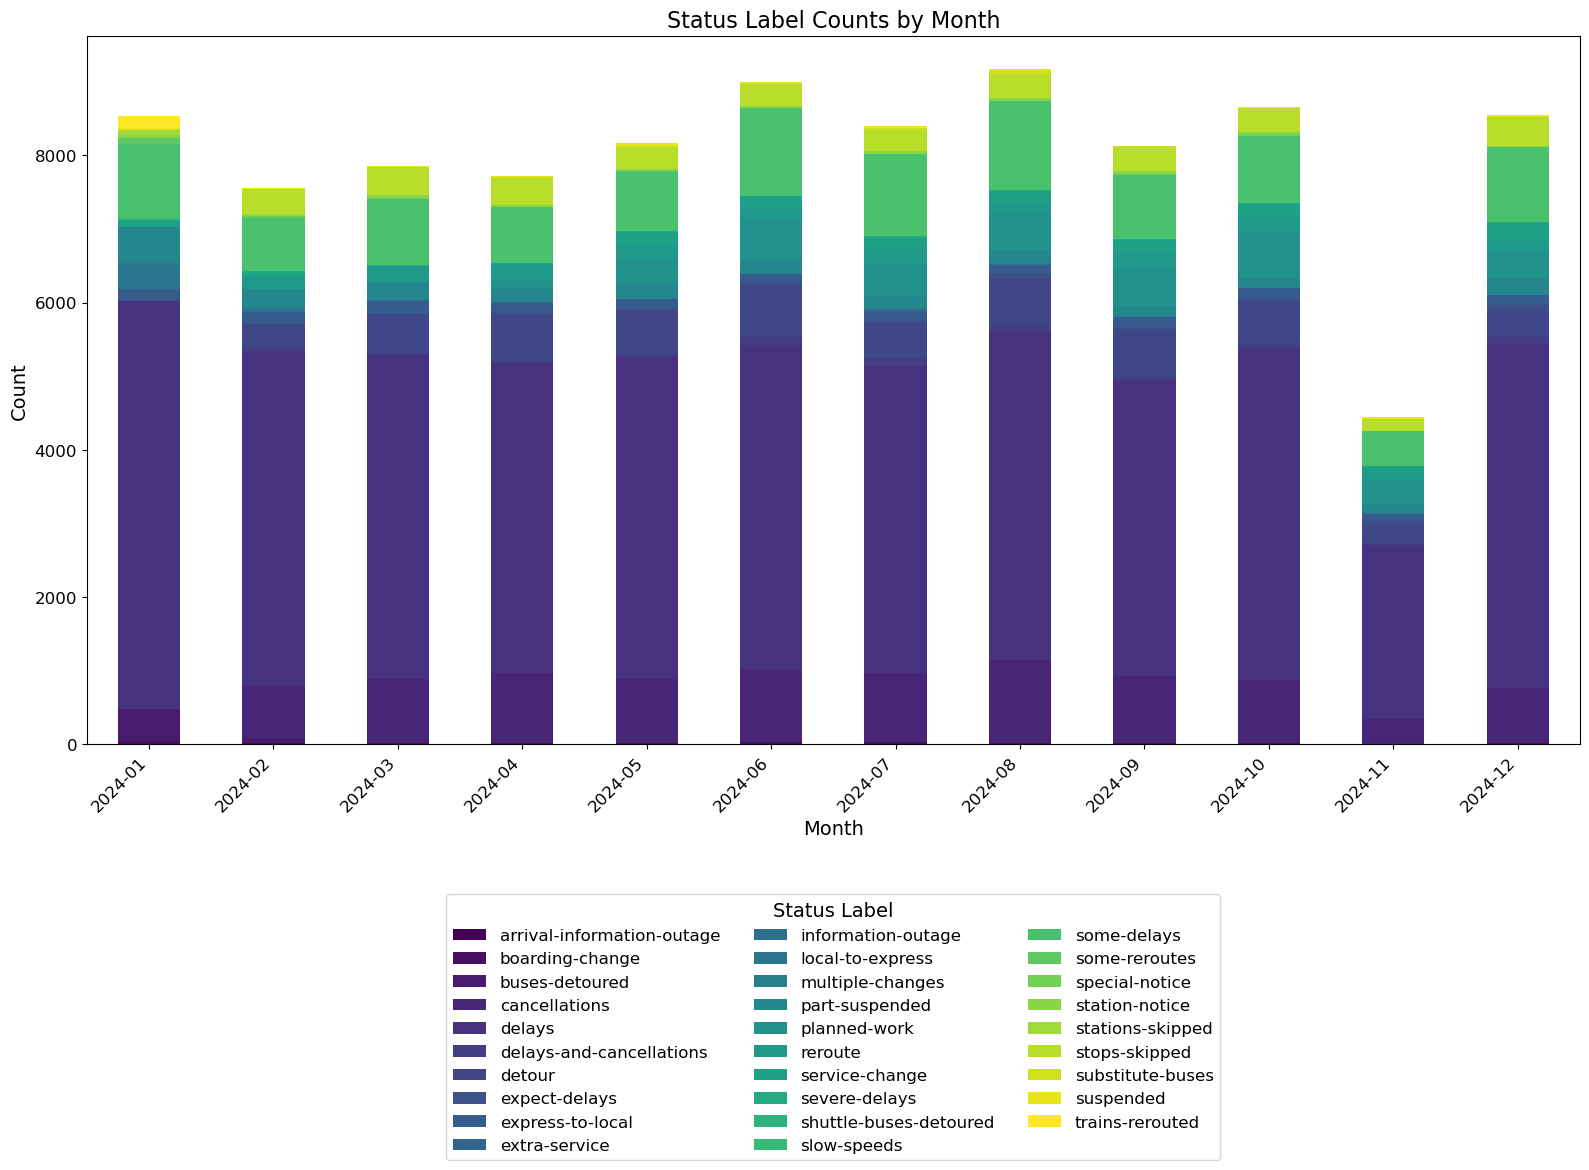

In [109]:
def analyze_and_plot_status_labels_by_month(df, date_column, status_label_column):
    """
    Analyzes status labels by month, handling pipe-delimited lists,
    and plots a stacked bar chart with a larger horizontal legend below the plot.
    
    Args:
        df (pd.DataFrame): The DataFrame containing the data.
        date_column (str): The name of the datetime column.
        status_label_column (str): The name of the status label column.
    """
    # Ensure the date column is in datetime format
    df[date_column] = pd.to_datetime(df[date_column])
    
    # Extract the month from the date
    df['month'] = df[date_column].dt.to_period('M')
    
    # Explode pipe-delimited status labels into separate rows
    df = df.assign(status_label=df[status_label_column].str.split('|')).explode('status_label')
    
    # Strip whitespace and standardize status labels to ensure consistent matching
    df['status_label'] = df['status_label'].str.strip()
    
    # Group by month and status label, counting occurrences
    status_counts = df.groupby(['month', 'status_label']).size().reset_index(name='count')
    
    # Pivot the data for plotting
    status_counts_pivot = status_counts.pivot(index='month', columns='status_label', values='count').fillna(0)
    
    # Get unique status labels for consistent coloring
    unique_status_labels = sorted(df['status_label'].unique())  # Sort for consistency
    num_unique_labels = len(unique_status_labels)
    
    # Choose a colormap with enough distinct colors
    if num_unique_labels <= 10:
        cmap_name = 'tab10'
    elif num_unique_labels <= 20:
        cmap_name = 'tab20'
    else:
        cmap_name = 'viridis'  # For many labels, use a continuous colormap
    
    # Generate colors and create a dictionary mapping status labels to colors
    cmap = plt.cm.get_cmap(cmap_name, max(num_unique_labels, 10))  # Ensure at least 10 colors
    colors = [cmap(i) for i in range(num_unique_labels)]
    color_dict = dict(zip(unique_status_labels, colors))
    
    # Create a list of colors that matches the order of columns in the pivot table
    column_colors = [color_dict[col] for col in status_counts_pivot.columns]
    
    # Create figure with adjusted size for the horizontal legend
    plt.figure(figsize=(16, 10))
    
    # Create the plot area with slightly reduced height to make room for legend
    ax = plt.subplot(111)
    
    # Plot the stacked bar chart
    status_counts_pivot.plot(
        kind='bar', 
        stacked=True, 
        color=column_colors,
        ax=ax
    )
    
    # Calculate number of columns for the legend based on number of unique labels
    # Fewer columns results in larger legend items
    if num_unique_labels <= 4:
        ncol = num_unique_labels
    elif num_unique_labels <= 8:
        ncol = 4
    else:
        ncol = 3  # For many labels, use fewer columns to make each entry larger
    
    # Place legend horizontally at the bottom with increased fontsize
    legend = ax.legend(
        title='Status Label',
        loc='upper center', 
        bbox_to_anchor=(0.5, -0.2),  # Position further below the plot
        ncol=ncol,  # Fewer columns for larger legend items
        frameon=True,  # Add a frame around the legend
        fontsize=12,   # Increase font size for legend text
        title_fontsize=14  # Increase font size for legend title
    )
    
    # Increase the size of the legend markers
    # for handle in legend.legendHandles:
    #     handle.set_height(10)  # Make taller
    #     handle.set_width(24)   # Make wider
    
    plt.title('Status Label Counts by Month', fontsize=16)
    plt.xlabel('Month', fontsize=14)
    plt.ylabel('Count', fontsize=14)
    plt.xticks(rotation=45, ha='right', fontsize=12)
    plt.yticks(fontsize=12)
    
    # Adjust layout to make room for the larger legend
    plt.tight_layout()
    plt.subplots_adjust(bottom = 0.25)

    plt.savefig('pictures/service_alerts_count_monthly.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    # return status_counts_pivot, color_dict
    
    # return plt.figure()
analyze_and_plot_status_labels_by_month(df_srv_alt, 'Date', 'Status Label')

In [61]:
df[df['Status Label'].str.find("|")!=-1]

,Alert ID,Event ID,Update Number,Date,Agency,Status Label,Affected,Header,Description,just_date,status_label
6,281022,134322,0,2024-01-01 00:34:00,NYCT Subway,express-to-local | delays,4 | 5 | 6,4 5 trains are running on the local track betw...,4 5 trains will arrive on the upper levels at ...,2024-01-01,express-to-local
6,281022,134322,0,2024-01-01 00:34:00,NYCT Subway,express-to-local | delays,4 | 5 | 6,4 5 trains are running on the local track betw...,4 5 trains will arrive on the upper levels at ...,2024-01-01,delays
9,281025,134322,1,2024-01-01 01:04:00,NYCT Subway,express-to-local | delays,4 | 5 | 6,4 5 trains are running on the local track betw...,4 5 trains will arrive on the upper levels at ...,2024-01-01,express-to-local
9,281025,134322,1,2024-01-01 01:04:00,NYCT Subway,express-to-local | delays,4 | 5 | 6,4 5 trains are running on the local track betw...,4 5 trains will arrive on the upper levels at ...,2024-01-01,delays
10,281026,134322,2,2024-01-01 01:09:00,NYCT Subway,express-to-local | delays,4 | 5 | 6,4 5 trains are running on the local track betw...,4 5 trains will arrive on the upper levels at ...,2024-01-01,express-to-local
...,...,...,...,...,...,...,...,...,...,...,...
92237,379626,184954,4,2024-12-31 20:02:00,NYCT Subway,stops-skipped | delays,1 | 2 | 3,Southbound 1 trains are not stopping at 18 St....,What's Happening? \nNYPD is conducting an inve...,2024-12-31,delays
92238,379627,184957,1,2024-12-31 20:17:00,NYCT Subway,express-to-local | delays,6 | 6X,Northbound 6X express trains are running on th...,What's Happening?We are replacing a broken rai...,2024-12-31,express-to-local
92238,379627,184957,1,2024-12-31 20:17:00,NYCT Subway,express-to-local | delays,6 | 6X,Northbound 6X express trains are running on th...,What's Happening?We are replacing a broken rai...,2024-12-31,delays
92251,379639,184977,1,2024-12-31 21:02:00,NYCT Subway,stops-skipped | delays,4 | 5 | 6,Northbound 6 trains are running express from 1...,"For service to/from bypassed stops, take a sou...",2024-12-31,stops-skipped


In [23]:
# Define severity mapping (best guess: 1=Low, 5=High)
severity_map = {
    # Low Severity (Informational/Minor) - Level 1
    'arrival-information-outage': 1,
    'information-outage': 1,
    'special-notice': 1,
    'station-notice': 1,
    'extra-service': 1, # Could be considered neutral or positive
    'planned-work': 1, # Planned, so less disruptive impact assumed

    # Moderate Severity (Some Impact) - Level 2
    'boarding-change': 2,
    'slow-speeds': 2,
    'service-change': 2,
    'some-delays': 2,
    'expect-delays': 2,

    # Medium Severity (Noticeable Impact/Delays) - Level 3
    'delays': 3,
    'stops-skipped': 3,
    'stations-skipped': 3,
    'express-to-local': 3,
    'local-to-express': 3,
    'buses-detoured': 3,
    'shuttle-buses-detoured': 3,
    'detour': 3,
    'reroute': 3,
    'some-reroutes': 3,
    'trains-rerouted': 3,
    'substitute-buses': 3,

    # High Severity (Significant Impact) - Level 4
    'severe-delays': 4,
    'multiple-changes': 4,
    'delays-and-cancellations': 4,

    # Very High Severity (Major Disruption/Suspension) - Level 5
    'part-suspended': 5,
    'suspended': 5,
    'cancellations': 5,

    # Default for unknown/missing status
    'unknown': 0
}


def get_max_severity(status_label_str):
    """
    This functions reads the status label field and returns the max severity of the field, according to the severity level mapping.
    """
    if pd.isna(status_label_str):
        return severity_map['unknown']
    
    statuses = status_label_str.split('|')
    max_severity = 0
    for status in statuses:
        severity = severity_map.get(status.strip(), severity_map['unknown']) # Use .get() for safety
        if severity > max_severity:
            max_severity = severity
            
    # If no known statuses were found after splitting, return unknown
    if max_severity == 0 and statuses:
         return severity_map['unknown']
         
    return max_severity


df_srv_alt['Severity'] = df_srv_alt['Status Label'].apply(get_max_severity)

In [31]:
# # Function to extract delay minutes using regex
# def extract_delay_minutes(header_text):
#     if pd.isna(header_text):
#         return np.nan # Return NaN if header is missing

#     # Pattern 1: "X-Y minute delays" or "X - Y minute delays"
#     match1 = re.search(r'(\d+)\s*-\s*(\d+)\s+minute delays', header_text, re.IGNORECASE)
#     if match1:
#         # Return the higher end of the range
#         return int(match1.group(2))

#     # Pattern 2: "X minute delays" or "up to X minutes" or "approximately X minutes"
#     match2 = re.search(r'(?:up to|approximately)?\s*(\d+)\s+minute(?:s)?(?: delays)?', header_text, re.IGNORECASE)
#     if match2:
#         return int(match2.group(1))
        
#     # Pattern 3: Look for just "delays" without a number - maybe assign a default? (Optional)
#     # if 'delays' in header_text.lower():
#     #     return 10 # Assign a default value like 10 minutes if desired

#     # No specific delay minutes found
#     return np.nan # Return NaN if no pattern matches

In [39]:
df_srv_alt

,Alert ID,Event ID,Update Number,Date,Agency,Status Label,Affected,Header,Description,Severity,Hour
0,281016,134282,2,2024-01-01 00:01:00,NYCT Bus,delays,SIM1C,The following SIM1C trips will not run:\n\nFro...,We’re running as much service as we can with t...,3,2024-01-01 00:00:00
1,281017,134319,0,2024-01-01 00:11:00,NYCT Subway,delays,J,Jamaica Center-Parsons/Archer-bound J trains a...,NaN,3,2024-01-01 00:00:00
2,281018,134320,0,2024-01-01 00:12:00,NYCT Subway,delays,A,Northbound A trains are running with delays af...,NaN,3,2024-01-01 00:00:00
3,281019,134321,0,2024-01-01 00:20:00,NYCT Subway,local-to-express,C,Northbound C trains are running express from 1...,"For service to/from 135 St, take a southbound ...",3,2024-01-01 00:00:00
4,281020,134316,5,2024-01-01 00:24:00,LIRR,some-delays,City Terminal Zone,There are scattered delays along the City Term...,NaN,2,2024-01-01 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...
92281,379670,184992,2,2024-12-31 23:33:00,BT,some-delays,Bronx-Whitestone Bridge,BWB: Disabled vehicle; Queens bound cleared.,NaN,2,2024-12-31 23:00:00
92282,379671,184993,0,2024-12-31 23:48:00,NYCT Subway,delays,4,Northbound 4 trains are delayed while we reque...,NaN,3,2024-12-31 23:00:00
92283,379672,184994,0,2024-12-31 23:53:00,NYCT Subway,delays,2 | 5,Northbound 2/5 trains are delayed while we req...,NaN,3,2024-12-31 23:00:00
92284,379673,184993,1,2024-12-31 23:55:00,NYCT Subway,delays,4,Northbound 4 trains are running with delays af...,NaN,3,2024-12-31 23:00:00


In [65]:
df_srv_alt['Hour'] = df_srv_alt['Date'].dt.floor('h')

hourly_severity = df_srv_alt.groupby(['Agency', 'Hour'])['Severity'].max().reset_index()
hourly_severity_pivot = hourly_severity.pivot(index='Hour', columns='Agency', values='Severity').fillna(0)

hourly_severity_pivot.rename(columns={'BT':'BT_max_severity' ,'LIRR':'LIRR_max_severity',
                                      'MNR':'MNR_max_severity', 'NYCT Bus': 'NYCT_Bus_max_severity',
                                      'NYCT Subway': 'NYCT_Subway_max_severity'}, inplace=True)
hourly_severity_pivot

Agency,BT_max_severity,LIRR_max_severity,MNR_max_severity,NYCT_Bus_max_severity,NYCT_Subway_max_severity
Hour,,,,,
2024-01-01 00:00:00,0.0,2.0,0.0,3.0,3.0
2024-01-01 01:00:00,0.0,0.0,0.0,0.0,3.0
2024-01-01 02:00:00,0.0,0.0,2.0,0.0,5.0
2024-01-01 03:00:00,0.0,0.0,0.0,3.0,5.0
2024-01-01 04:00:00,0.0,0.0,0.0,0.0,3.0
...,...,...,...,...,...
2024-12-31 19:00:00,0.0,0.0,0.0,5.0,3.0
2024-12-31 20:00:00,0.0,0.0,0.0,5.0,3.0
2024-12-31 21:00:00,2.0,0.0,0.0,0.0,5.0


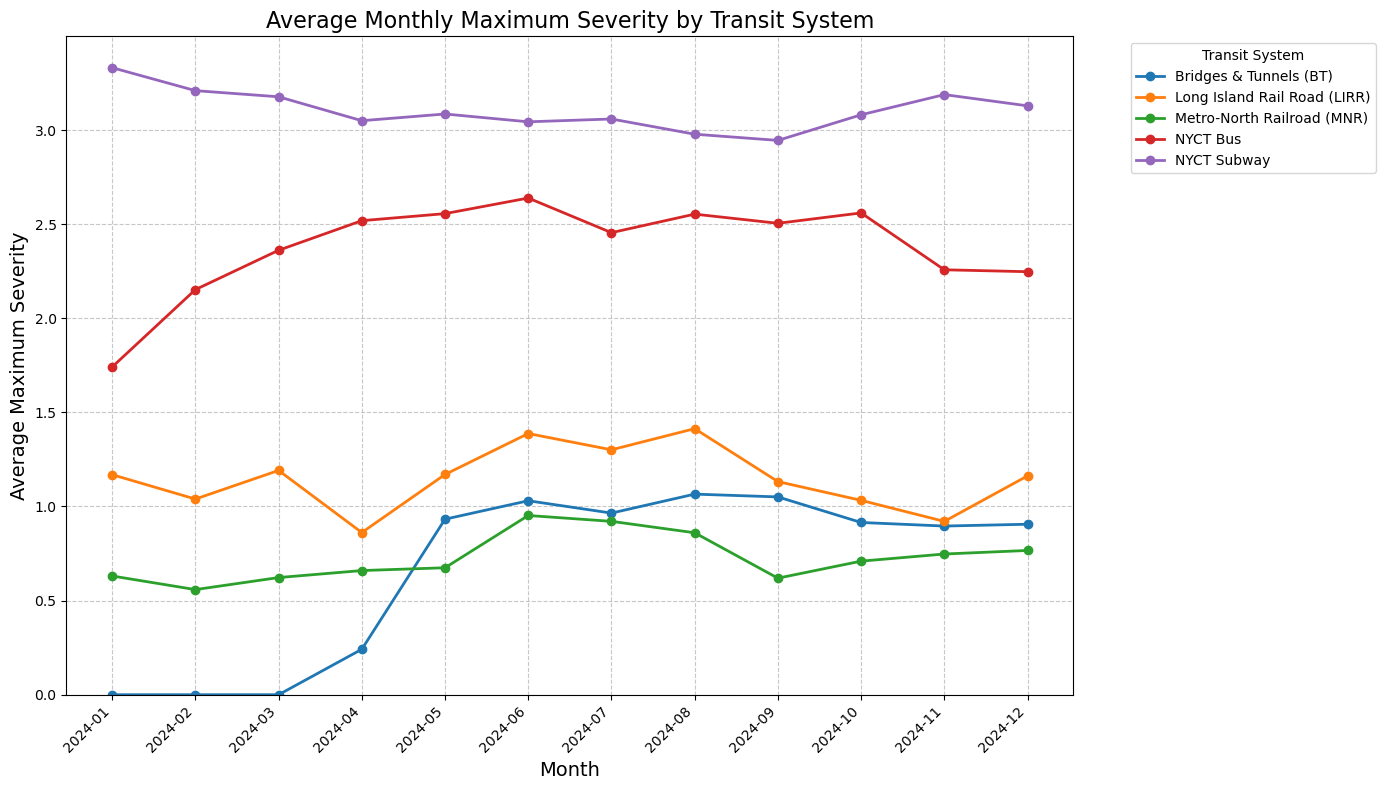

In [113]:
df_severity_copy = hourly_severity_pivot.copy()
df_severity_copy.reset_index(inplace = True)
df_severity_copy['Month'] = df_severity_copy['Hour'].dt.to_period('M')
df_severity_gb = df_severity_copy.groupby('Month').mean().drop(columns='Hour')
severity_cols = ['BT_max_severity', 'LIRR_max_severity', 'MNR_max_severity',
                     'NYCT_Bus_max_severity', 'NYCT_Subway_max_severity']

# Create a figure and axis
plt.figure(figsize=(14, 8))

pretty_labels = {
    'BT_max_severity': 'Bridges & Tunnels (BT)',
    'LIRR_max_severity': 'Long Island Rail Road (LIRR)',
    'MNR_max_severity': 'Metro-North Railroad (MNR)',
    'NYCT_Bus_max_severity': 'NYCT Bus',
    'NYCT_Subway_max_severity': 'NYCT Subway'
}

# Plot each severity column
for i, col in enumerate(severity_cols):
    plt.plot(df_severity_gb.index.astype(str), df_severity_gb[col], marker='o', linewidth=2, label=pretty_labels[col])

# Add labels and title
plt.title('Average Monthly Maximum Severity by Transit System', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Average Maximum Severity', fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Add grid for better readability
plt.grid(True, linestyle='--', alpha=0.7)

# Add legend with clear positioning
plt.legend(title='Transit System', bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjust y-axis to start from 0
plt.ylim(bottom=0)

# Annotate the highest severity point for each system
# for col in severity_cols:
#     max_idx = df_severity_gb[col].idxmax()
#     max_val = df_severity_gb.loc[max_idx, col]
#     plt.annotate(f'{max_val:.2f}', 
#                  xy=(str(max_idx), max_val),
#                  xytext=(0, 10),
#                  textcoords='offset points',
#                  ha='center',
#                  fontweight='bold')

# Adjust layout
plt.tight_layout()

# plt.savefig('pictures/service_alerts_monthly_max_severity_by_agency.png', dpi=300, bbox_inches='tight')
# Show the plot
plt.show()



In [67]:
# df_service_severity = df_srv_alt.merge(hourly_severity_pivot, on='Hour').drop(columns = ['Status Label', 'Alert ID', 'Event ID', 'Update Number', 'Agency','Affected', 'Header', 'Description', 'Severity', 'Date'])

# df_service_severity = df_service_severity.drop_duplicates()
# df_service_severity

In [145]:
hourly_severity_pivot = hourly_severity_pivot.reset_index()
df_data_full = df_data_sans_delays.merge(hourly_severity_pivot, how='left', left_on = 'pickup_dttm', right_on = 'Hour').drop(columns=['Hour']).fillna(0)
df_data_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17568 entries, 0 to 17567
Data columns (total 53 columns):
 #   Column                                                   Non-Null Count  Dtype         
---  ------                                                   --------------  -----         
 0   pickup_date                                              17568 non-null  datetime64[ns]
 1   pickup_hour                                              17568 non-null  int64         
 2   trip_count                                               17568 non-null  int64         
 3   PULocationID_mode                                        17568 non-null  int64         
 4   DOLocationID_mode                                        17568 non-null  int64         
 5   is_weekend_mode                                          17568 non-null  bool          
 6   trip_miles_mean                                          17568 non-null  float64       
 7   trip_time_mean                                   

In [147]:
df_data_full = df_data_full.drop(columns = ['pickup_date', 'pickup_hour'])
# df_data_full.to_csv('data/combined_data.csv')